## Customer Segmentation

In [1]:
import sys
print(sys.executable)

C:\Users\harsh\anaconda3\python.exe


In [2]:
!pip install plotly

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings
import matplotlib.cm as cm
import itertools


from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


from wordcloud import WordCloud, STOPWORDS
from IPython.display import display, HTML
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

In [4]:
# Load and read the dataset
df_init = pd.read_excel('Online Retail.xlsx', dtype={'CustomerID': str,'InvoiceID': str})
print('Dataframe dimensions:', df_init.shape)

Dataframe dimensions: (541909, 8)


In [5]:
df_init.head(5) # display five rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [6]:
# Check for Invoiceno unique numbers
# check for how unique the Invoiceno are related to Counrty, CustomerId, and maybe StockCode
# Get more information from each Feature

In [7]:
df_init.dtypes  # data type

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

In [8]:
df_init.isnull().sum()  # check for null values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df_init.shape[0]  # number of rows

541909

In [10]:
df_init['InvoiceDate'] = pd.to_datetime(df_init['InvoiceDate'])

col_info = pd.DataFrame(df_init.dtypes).T.rename(index={0:'column type'}) 

col_info = col_info.append(pd.DataFrame(df_init.isnull().sum()).T.rename(index={0:'null values (nb)'}))

col_info = col_info.append(pd.DataFrame(df_init.isnull().sum()/df_init.shape[0]*100).T.rename
                           (index={0:'null values (%)'}))

In [11]:
display(col_info)  # display the col_info dataframe

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
column type,object,object,object,int64,datetime64[ns],float64,object,object
null values (nb),0,0,1454,0,0,0,135080,0
null values (%),0.0,0.0,0.268311,0.0,0.0,0.0,24.926694,0.0


In [12]:
# show first 5 rows
display(df_init[:5])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [13]:
df_init.dropna(axis = 0, subset = ['CustomerID'], inplace = True)
print('Dataframe dimensions:', df_init.shape)

Dataframe dimensions: (406829, 8)


In [14]:
# Giving some infos on columns types and number of null values
col_info = pd.DataFrame(df_init.dtypes).T.rename(index={0:'column type'})
col_info = col_info.append(pd.DataFrame(df_init.isnull().sum()).T.rename(index={0:'null values (nb)'}))

col_info = col_info.append(pd.DataFrame(df_init.isnull().sum()/df_init.shape[0]*100).T.
                           rename(index={0:'null values (%)'}))
display(col_info)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
column type,object,object,object,int64,datetime64[ns],float64,object,object
null values (nb),0,0,0,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# check data type
df_init.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

In [16]:
# there seem not to be any missing value in our dataset
df_init.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [17]:
df_init['Country'].duplicated().value_counts()

True     406792
False        37
Name: Country, dtype: int64

In [18]:
df_init['InvoiceNo'].duplicated().value_counts()

True     384639
False     22190
Name: InvoiceNo, dtype: int64

In [19]:
print('Duplicate Entries: {}'.format(df_init.duplicated().sum()))
df_init.drop_duplicates(inplace = True)

Duplicate Entries: 5225


In [20]:
print("Shape of the data set after droping duplicate entries :", format(df_init.shape))

Shape of the data set after droping duplicate entries : (401604, 8)


In [21]:
# group the CustomerId, InvoiceNo and Country column in the following order and take count
temp_cou = df_init[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()

In [22]:
# this displays the individual customers IDs', different InvoiceNo based on dates of purchase and the customer's country
temp_cou

Empty DataFrame
Columns: []
Index: [(12346, 541431, United Kingdom), (12346, C541433, United Kingdom), (12347, 537626, Iceland), (12347, 542237, Iceland), (12347, 549222, Iceland), (12347, 556201, Iceland), (12347, 562032, Iceland), (12347, 573511, Iceland), (12347, 581180, Iceland), (12348, 539318, Finland), (12348, 541998, Finland), (12348, 548955, Finland), (12348, 568172, Finland), (12349, 577609, Italy), (12350, 543037, Norway), (12352, 544156, Norway), (12352, 545323, Norway), (12352, 545332, Norway), (12352, 546869, Norway), (12352, 547390, Norway), (12352, 567505, Norway), (12352, 568699, Norway), (12352, 574275, Norway), (12352, C545329, Norway), (12352, C545330, Norway), (12352, C547388, Norway), (12353, 553900, Bahrain), (12354, 550911, Spain), (12355, 552449, Bahrain), (12356, 541430, Portugal), (12356, 549435, Portugal), (12356, 576895, Portugal), (12357, 574740, Switzerland), (12358, 559707, Austria), (12358, 581232, Austria), (12359, 540946, Cyprus), (12359, 543370, Cyprus), (12359, 555477, Cyprus), (12359, 571034, Cyprus), (12359, C549955, Cyprus), (12359, C580165, Cyprus), (12360, 554132, Austria), (12360, 563749, Austria), (12360, 571705, Austria), (12361, 545017, Belgium), (12362, 544203, Belgium), (12362, 551346, Belgium), (12362, 559295, Belgium), (12362, 563037, Belgium), (12362, 568651, Belgium), (12362, 570667, Belgium), (12362, 572887, Belgium), (12362, 573173, Belgium), (12362, 574329, Belgium), (12362, 580979, Belgium), (12362, C544902, Belgium), (12362, C563752, Belgium), (12362, C579178, Belgium), (12363, 549687, Unspecified), (12363, 563947, Unspecified), (12364, 563854, Belgium), (12364, 567897, Belgium), (12364, 573401, Belgium), (12364, 580152, Belgium), (12365, 544574, Cyprus), (12365, 544578, Cyprus), (12365, C544577, Cyprus), (12367, 580716, Denmark), (12370, 538826, Cyprus), (12370, 539330, Austria), (12370, 546236, Cyprus), (12370, 571905, Cyprus), (12371, 570521, Switzerland), (12371, 572770, Switzerland), (12372, 544157, Denmark), (12372, 552731, Denmark), (12372, 568872, Denmark), (12373, 542887, Austria), (12374, 576345, Austria), (12375, 565333, Finland), (12375, 579281, Finland), (12375, C581071, Finland), (12377, 539488, Switzerland), (12377, 542586, Switzerland), (12378, 562046, Switzerland), (12379, 557789, Belgium), (12379, 567196, Belgium), (12379, C559193, Belgium), (12380, 555739, Belgium), (12380, 567928, Belgium), (12380, 571187, Belgium), (12380, 577180, Belgium), (12380, C572532, Belgium), (12381, 563100, Norway), (12381, 570681, Norway), (12381, 570725, Norway), (12381, 574694, Norway), (12381, 580638, Norway), (12381, C565050, Norway), (12383, 539840, Belgium), ...]

[22190 rows x 0 columns]

In [23]:
# Add an index number 
# reset_index() is a method to reset index of a Data Frame.
# reset_index() method sets a list of integer ranging from 0 to length of data as index.
temp_cou = temp_cou.reset_index(drop = False)

In [24]:
temp_cou

,CustomerID,InvoiceNo,Country
0,12346,541431,United Kingdom
1,12346,C541433,United Kingdom
2,12347,537626,Iceland
3,12347,542237,Iceland
4,12347,549222,Iceland
...,...,...,...
22185,18283,579673,United Kingdom
22186,18283,580872,United Kingdom
22187,18287,554065,United Kingdom
22188,18287,570715,United Kingdom


In [25]:
# Take count of the number of unique countries
countries = temp_cou['Country'].value_counts()
print('No. of countries in the dataframe: {}'.format(len(countries)))

No. of countries in the dataframe: 37


In [26]:
countries.index

Index(['United Kingdom', 'Germany', 'France', 'EIRE', 'Belgium', 'Spain',
       'Netherlands', 'Switzerland', 'Portugal', 'Australia', 'Italy',
       'Finland', 'Sweden', 'Norway', 'Channel Islands', 'Japan', 'Poland',
       'Denmark', 'Cyprus', 'Austria', 'Singapore', 'Malta', 'Unspecified',
       'USA', 'Iceland', 'Israel', 'Canada', 'Greece', 'Czech Republic',
       'European Community', 'Lithuania', 'United Arab Emirates',
       'Saudi Arabia', 'Bahrain', 'RSA', 'Lebanon', 'Brazil'],
      dtype='object')

In [27]:
countries

United Kingdom          19857
Germany                   603
France                    458
EIRE                      319
Belgium                   119
Spain                     105
Netherlands               101
Switzerland                71
Portugal                   70
Australia                  69
Italy                      55
Finland                    48
Sweden                     46
Norway                     40
Channel Islands            33
Japan                      28
Poland                     24
Denmark                    21
Cyprus                     20
Austria                    19
Singapore                  10
Malta                      10
Unspecified                 8
USA                         7
Iceland                     7
Israel                      6
Canada                      6
Greece                      6
Czech Republic              5
European Community          5
Lithuania                   4
United Arab Emirates        3
Saudi Arabia                2
Bahrain   

A `choropleth map` is a type of thematic map in which areas are shaded or patterned in proportion to a statistical variable that represents an aggregate summary of a geographic characteristic within each area, such as population density or per-capita income.

### Customers and products

The dataframe contains `401,604 entries`. What are the number of users and products in these entries?

In [28]:
df_init

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [29]:
len(df_init['CustomerID'].value_counts())

4372

In [30]:
pd.DataFrame([{'products': len(df_init['StockCode'].value_counts()),    
               'transactions': len(df_init['InvoiceNo'].value_counts()),
               'customers': len(df_init['CustomerID'].value_counts()),}], 
             columns = ['products', 'transactions', 'customers'], index = ['quantity'])

,products,transactions,customers
quantity,3684,22190,4372


* The Dataframe above shows that the data concern `4372` users and that they bought `3684` different products. 

* The total number of `transactions` carried out is of the order of  `∼ 22190`.

In [31]:
temp_pro = df_init.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()

# Rename the InvoiceDate to number of products
nb_products_per_basket = temp_pro.rename(columns = {'InvoiceDate':'Number of products'})

# Sort in Ascending order based on CustomerID
nb_products_per_basket[:10].sort_values('CustomerID') # List first 10 values

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24
5,12347,556201,18
6,12347,562032,22
7,12347,573511,47
8,12347,581180,11
9,12348,539318,17


#### The first lines of this list shows several things worthy of interest:

* the existence of entries with the prefix `C` for the `InvoiceNo variable`: this indicates transactions that have been canceled.

* the existence of users who only came `once` and only `purchased` one `product` (e.g. `nº12346`)

* the existence of `frequent users` that buy a large number of items at each order.

### Cancelling orders

The best way to approach this is that I'll count the number of `transactions` corresponding to `canceled orders`:

In [32]:
display(df_init.sort_values('CustomerID')[:5])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom
286623,562032,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2011-08-02 08:48:00,4.25,12347,Iceland
72260,542237,84991,60 TEATIME FAIRY CAKE CASES,24,2011-01-26 14:30:00,0.55,12347,Iceland
14943,537626,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347,Iceland


On these few lines, we see that when an order is `canceled`, we have another `transactions` in the dataframe, mostly identical except for the `Quantity` and `InvoiceDate variables`. I'll check if this is true for all the entries. 
To do this, I decide to locate the `entries` that indicate a `negative quantity` and check if there is `systematically` an order indicating the `same quantity (but positive)`, with the `same description (CustomerID, Description and UnitPrice)`:

In [33]:
# Check any negative value in the Quantity variable / entries that indicate a negative quantity
df_check = df_init[df_init['Quantity'] < 0][['CustomerID','Quantity','StockCode','Description','UnitPrice']]

# Iterate through the rows, check if there is an order indicating same quantity(but positive), with same description(CustomerID
# , Description, and UnitPrice)
for index, col in  df_check.iterrows():
    if df_init[(df_init['CustomerID'] == col[0]) & (df_init['Quantity'] == -col[1]) 
                & (df_init['Description'] == col[2])].shape[0] == 0: 
        print(df_check.loc[index])
        print(15*'-'+'>'+' HYPOTHESIS NOT FULFILLED')
        break

CustomerID        14527
Quantity             -1
StockCode             D
Description    Discount
UnitPrice          27.5
Name: 141, dtype: object
---------------> HYPOTHESIS NOT FULFILLED


In [34]:
df_check = df_init[df_init['Quantity'] < 0][['CustomerID','Quantity','StockCode','Description','UnitPrice']]
df_check

,CustomerID,Quantity,StockCode,Description,UnitPrice
141,14527,-1,D,Discount,27.50
154,15311,-1,35004C,SET OF 3 COLOURED FLYING DUCKS,4.65
235,17548,-12,22556,PLASTERS IN TIN CIRCUS PARADE,1.65
236,17548,-24,21984,PACK OF 12 PINK PAISLEY TISSUES,0.29
237,17548,-24,21983,PACK OF 12 BLUE PAISLEY TISSUES,0.29
...,...,...,...,...,...
540449,14397,-11,23144,ZINC T-LIGHT HOLDER STARS SMALL,0.83
541541,15498,-1,M,Manual,224.69
541715,15311,-5,21258,VICTORIAN SEWING BOX LARGE,10.95
541716,17315,-1,84978,HANGING HEART JAR T-LIGHT HOLDER,1.25


In [35]:
# df_new = df_check.loc[df_check.CustomerID.isin([17548])]
# df_new

We see that the `initial hypothesis` is not fulfilled because of the existence of a `'Discount'` entry. I check again the hypothesis but this time discarding the `'Discount'` entries

In [36]:
# Basically doing what the code above does, but will discard the `Discount` column
df_check = df_init[(df_init['Quantity'] < 0) & (df_init['Description'] != 'Discount')][['CustomerID','Quantity','StockCode',
                                  'Description','UnitPrice']]

for index, col in  df_check.iterrows():
    if df_init[(df_init['CustomerID'] == col[0]) & (df_init['Quantity'] == -col[1]) & 
               (df_init['Description'] == col[2])].shape[0] == 0: 
        print(index, df_check.loc[index])
        print(15*'-'+'>'+' HYPOTHESIS NOT FULFILLED')
        break

154 CustomerID                               15311
Quantity                                    -1
StockCode                               35004C
Description    SET OF 3 COLOURED  FLYING DUCKS
UnitPrice                                 4.65
Name: 154, dtype: object
---------------> HYPOTHESIS NOT FULFILLED


At this point, I decide to create a new variable in the dataframe that indicate if part of the command has been canceled. For the cancellations without counterparts, a few of them are probably due to the fact that the buy orders were performed before `December 2010` (the point of entry of the database). Below, I make a census of the `cancel orders` and check for the existence of counterparts:

In [37]:
df_cleaned = df_init.copy(deep = True)  # made a deep copy of our dataset
df_cleaned['QuantityCanceled'] = 0      # initialize the new varaible in the dataframe

# 
entry_to_remove = [] ; doubtfull_entry = []


for index, col in  df_init.iterrows():
    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue        
    df_test = df_init[(df_init['CustomerID'] == col['CustomerID']) &
                         (df_init['StockCode']  == col['StockCode']) & 
                         (df_init['InvoiceDate'] < col['InvoiceDate']) & 
                         (df_init['Quantity']   > 0)].copy()
    
    # Cancelation WITHOUT counterpart
    if (df_test.shape[0] == 0): 
        doubtfull_entry.append(index)
        
    # Cancelation WITH a counterpart
    elif (df_test.shape[0] == 1): 
        index_order = df_test.index[0]
        df_cleaned.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        entry_to_remove.append(index) 
        
    # Various counterparts exist in orders: we delete the last one
    elif (df_test.shape[0] > 1): 
        df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
        for ind, val in df_test.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            df_cleaned.loc[ind, 'QuantityCanceled'] = -col['Quantity']
            entry_to_remove.append(index) 
            break 

In [38]:
print("entry_to_remove: {}".format(len(entry_to_remove)))
print("doubtfull_entry: {}".format(len(doubtfull_entry)))

entry_to_remove: 7521
doubtfull_entry: 1226


Among these entries, the lines listed in the `doubtfull_entry` list correspond to the entries indicating a `cancellation` but for which there is no command beforehand. In practice, I decided to delete all of these entries, which count respectively for  `∼ 1.4%` and `0.2%` of the dataframe entries.

In [39]:
# Drop the `entry_to_remove` and `doubtfull_entry` accross the row axis
df_cleaned.drop(entry_to_remove, axis = 0, inplace = True)
df_cleaned.drop(doubtfull_entry, axis = 0, inplace = True)

In [40]:
remaining_entries = df_cleaned[(df_cleaned['Quantity'] < 0) & (df_cleaned['StockCode'] != 'D')]
print("nb of entries to delete: {}".format(remaining_entries.shape[0]))
remaining_entries.head(5)

nb of entries to delete: 48


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
77598,C542742,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,-94,2011-01-31 16:26:00,0.65,15358,United Kingdom,0
90444,C544038,22784,LANTERN CREAM GAZEBO,-4,2011-02-15 11:32:00,4.95,14659,United Kingdom,0
111968,C545852,22464,HANGING METAL HEART LANTERN,-5,2011-03-07 13:49:00,1.65,14048,United Kingdom,0
116064,C546191,47566B,TEA TIME PARTY BUNTING,-35,2011-03-10 10:57:00,0.70,16422,United Kingdom,0
132642,C547675,22263,FELT EGG COSY LADYBIRD,-49,2011-03-24 14:07:00,0.66,17754,United Kingdom,0


In [41]:
remaining_entries.sort_index(axis=0)[:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
77598,C542742,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,-94,2011-01-31 16:26:00,0.65,15358,United Kingdom,0
90444,C544038,22784,LANTERN CREAM GAZEBO,-4,2011-02-15 11:32:00,4.95,14659,United Kingdom,0
111968,C545852,22464,HANGING METAL HEART LANTERN,-5,2011-03-07 13:49:00,1.65,14048,United Kingdom,0
116064,C546191,47566B,TEA TIME PARTY BUNTING,-35,2011-03-10 10:57:00,0.70,16422,United Kingdom,0
132642,C547675,22263,FELT EGG COSY LADYBIRD,-49,2011-03-24 14:07:00,0.66,17754,United Kingdom,0


In [42]:
df_cleaned.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0


In [43]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392857 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         392857 non-null  object        
 1   StockCode         392857 non-null  object        
 2   Description       392857 non-null  object        
 3   Quantity          392857 non-null  int64         
 4   InvoiceDate       392857 non-null  datetime64[ns]
 5   UnitPrice         392857 non-null  float64       
 6   CustomerID        392857 non-null  object        
 7   Country           392857 non-null  object        
 8   QuantityCanceled  392857 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 30.0+ MB


We see that the quantity canceled is greater than the sum of the previous purchases.

### StockCode

Above, it has been seen that some values of the `StockCode` variable indicate a particular transaction (i.e. `D for Discount`). let's check the contents of this variable by looking for the set of codes that would contain only letters:

In [44]:
list_special_codes = df_cleaned[df_cleaned['StockCode'].str.contains('^[a-zA-Z]+', regex=True,na=False)]['StockCode'].unique()
list_special_codes

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT'],
      dtype=object)

In [45]:
# Pick this uniques characters from Description that corresponds to the special codes
for code in list_special_codes:
    print("{:<15} -> {:<30}".format(code, df_cleaned[df_cleaned['StockCode'] == code]['Description'].unique()[0]))

POST            -> POSTAGE                       
D               -> Discount                      
C2              -> CARRIAGE                      
M               -> Manual                        
BANK CHARGES    -> Bank Charges                  
PADS            -> PADS TO MATCH ALL CUSHIONS    
DOT             -> DOTCOM POSTAGE                


Postage -- Cost of sending smthg in mail
Discount -- reduced price offered by business
Carriage -- shipping or transport expenses

We see that there are several types of `peculiar transactions`, connected e.g. to `port charges` or `bank charges`.

### Basket Price

Will create a `new variable` that indicates the `total price of every purchase`:

In [46]:
df_cleaned['TotalPrice'] = df_cleaned['UnitPrice'] * (df_cleaned['Quantity'] - df_cleaned['QuantityCanceled'])
df_cleaned.sort_values('CustomerID')[:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,74215,0.0
148288,549222,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2011-04-07 10:43:00,4.25,12347,Iceland,0,17.0
428971,573511,22698,PINK REGENCY TEACUP AND SAUCER,12,2011-10-31 12:25:00,2.95,12347,Iceland,0,35.4
428970,573511,47559B,TEA TIME OVEN GLOVE,10,2011-10-31 12:25:00,1.25,12347,Iceland,0,12.5
428969,573511,47567B,TEA TIME KITCHEN APRON,6,2011-10-31 12:25:00,5.95,12347,Iceland,0,35.7


In [47]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392857 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         392857 non-null  object        
 1   StockCode         392857 non-null  object        
 2   Description       392857 non-null  object        
 3   Quantity          392857 non-null  int64         
 4   InvoiceDate       392857 non-null  datetime64[ns]
 5   UnitPrice         392857 non-null  float64       
 6   CustomerID        392857 non-null  object        
 7   Country           392857 non-null  object        
 8   QuantityCanceled  392857 non-null  int64         
 9   TotalPrice        392857 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 33.0+ MB


Each entry of the dataframe indicates `prizes` for a `single kind of product`. Hence, orders are split on several lines. Will have to collect all the purchases made during a single order to recover the total order prize:

In [48]:
df_cleaned['InvoiceDate_int'] = df_cleaned['InvoiceDate'].astype('int64')
df_cleaned[:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,InvoiceDate_int
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,15.30,1291191960000000000
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,1291191960000000000
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,22.00,1291191960000000000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,1291191960000000000
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,1291191960000000000


In [49]:
# sum of purchases / user & order
temp_sum = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['TotalPrice'].sum()
basket_price = temp_sum.rename(columns = {'TotalPrice':'Basket Price'})

# date of the order
df_cleaned['InvoiceDate_int'] = df_cleaned['InvoiceDate'].astype('int64')
temp_date = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate_int'].mean()
df_cleaned.drop('InvoiceDate_int', axis = 1, inplace = True)
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp_date['InvoiceDate_int'])

# selection of significant entries:
basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('CustomerID')[:6]

,CustomerID,InvoiceNo,Basket Price,InvoiceDate
1,12347,537626,711.79,2010-12-07 14:57:00.000000000
2,12347,542237,475.39,2011-01-26 14:29:59.999999744
3,12347,549222,636.25,2011-04-07 10:43:00.000000000
4,12347,556201,382.52,2011-06-09 13:01:00.000000000
5,12347,562032,584.91,2011-08-02 08:48:00.000000000
6,12347,573511,1294.32,2011-10-31 12:25:00.000000000


In [50]:
basket_price.tail(6)

,CustomerID,InvoiceNo,Basket Price,InvoiceDate
18626,18283,578262,307.05,2011-11-23 13:27:00
18627,18283,579673,220.31,2011-11-30 12:59:00
18628,18283,580872,208.00,2011-12-06 12:02:00
18629,18287,554065,765.28,2011-05-22 10:39:00
18630,18287,570715,1001.32,2011-10-12 10:23:00
18631,18287,573167,70.68,2011-10-28 09:29:00


To get a global/clear view of the type of order performed in this dataset, I determine how the `purchases` are divided according to `total prizes`

In [51]:
basket_price.max(), basket_price.min()

(CustomerID                    18287
 InvoiceNo                    581587
 Basket Price                30757.0
 InvoiceDate     2011-12-09 12:50:00
 dtype: object,
 CustomerID                    12347
 InvoiceNo                    536365
 Basket Price                   0.38
 InvoiceDate     2010-12-01 08:26:00
 dtype: object)

In [52]:
nice = [23, 4, 56, 7, 89, 0.45, 56]
print(enumerate(nice))

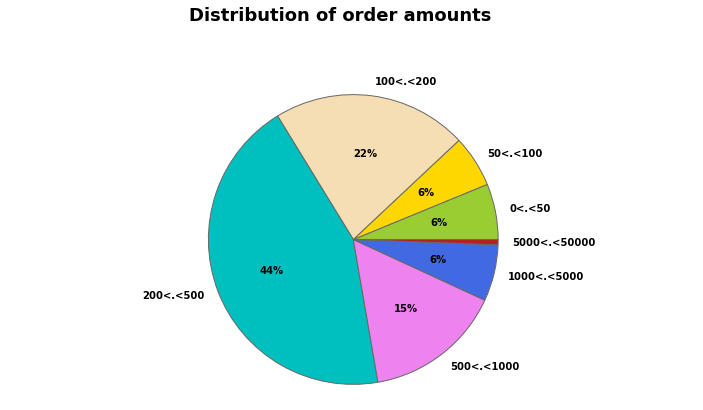

In [53]:
# Purchase count
price_range = [0, 50, 100, 200, 500, 1000, 5000, 50000]

count_price = []

for i, price in enumerate(price_range):
    if i == 0: continue
    val = basket_price[(basket_price['Basket Price'] < price) &
                       (basket_price['Basket Price'] > price_range[i-1])]['Basket Price'].count()
    count_price.append(val)
    


# Representation of the number of purchases / amount    
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue','firebrick']
labels = [ '{}<.<{}'.format(price_range[i-1], s) for i,s in enumerate(price_range) if i != 0]
sizes  = count_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
ax.pie(sizes, explode = explode, labels=labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle=0)
ax.axis('equal')
f.text(0.5, 1.01, "Distribution of order amounts", ha='center', fontsize = 18);

It can be seen that the vast majority of orders concern relatively large purchases given that  `∼65%` of purchases give prizes in excess of `£200`.

### Products Description

As a first step, I extract from the `Description variable` the information that will prove useful. The function below will handle this task:

In [54]:
# part-of-speech 
is_noun = lambda pos: pos[:2] == 'NN'

def keywords_inventory(dataframe, colonne = 'Description'):
    stemmer = nltk.stem.SnowballStemmer("english")  # NLTK stemmer (Snowball stemmer)
    keywords_roots  = dict()  # collect the words / root
    keywords_select = dict()  # association: root <-> keyword
    category_keys   = []
    count_keywords  = dict()
    icount = 0
    for s in dataframe[colonne]:
        if pd.isnull(s): continue
        lines = s.lower()
        tokenized = nltk.word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
        
        for t in nouns:
            t = t.lower() ; racine = stemmer.stem(t)
            if racine in keywords_roots:                
                keywords_roots[racine].add(t)
                count_keywords[racine] += 1                
            else:
                keywords_roots[racine] = {t}
                count_keywords[racine] = 1
                
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:  
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)            
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
            
            
    print("No. of keywords in variable '{}': {}".format(colonne,len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords

This function takes as `input` the dataframe and `analyzes the content` of the `Description` column by performing the following operations:

* extract the names (proper, common) appearing in the products description

* for each name, I extract the root of the word and aggregate the set of names associated with this particular root

* count the number of times each root appears in the dataframe

* when several words are listed for the same root, I consider that the keyword associated with this root is the shortest name (this systematically selects the singular when there are singular/plural variants)


The first step of the `analysis` is to retrieve the list of products:

In [55]:
df_products = pd.DataFrame(df_init['Description'].unique()).rename(columns = {0:'Description'})

In [56]:
df_products

,Description
0,WHITE HANGING HEART T-LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.
...,...
3891,"LETTER ""W"" BLING KEY RING"
3892,"LETTER ""Z"" BLING KEY RING"
3893,PINK CRYSTAL SKULL PHONE CHARM
3894,CREAM HANGING HEART T-LIGHT HOLDER


Once this list is created, Will have to use the function I previously defined in order to analyze the `description` of the various products:

In [57]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 11001] getaddrinfo failed>


False

In [58]:
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_products)

No. of keywords in variable 'Description': 1483


The execution of this function returns three variables:

* `keywords:` the list of extracted keywords

* `keywords_roots:` a dictionary where the keys are the keywords roots and the values are the lists of words associated with those roots

* `count_keywords:` dictionary listing the number of times every word is used

At this point, I'll convert the `count_keywords` dictionary into a list, to sort the `keywords` according to their occurences:

In [59]:
list_products = []
for k,v in count_keywords.items():
    list_products.append([keywords_select[k],v])
list_products.sort(key = lambda x:x[1], reverse = True)

Using it, I'll create a `representation` of the `most common keywords`:

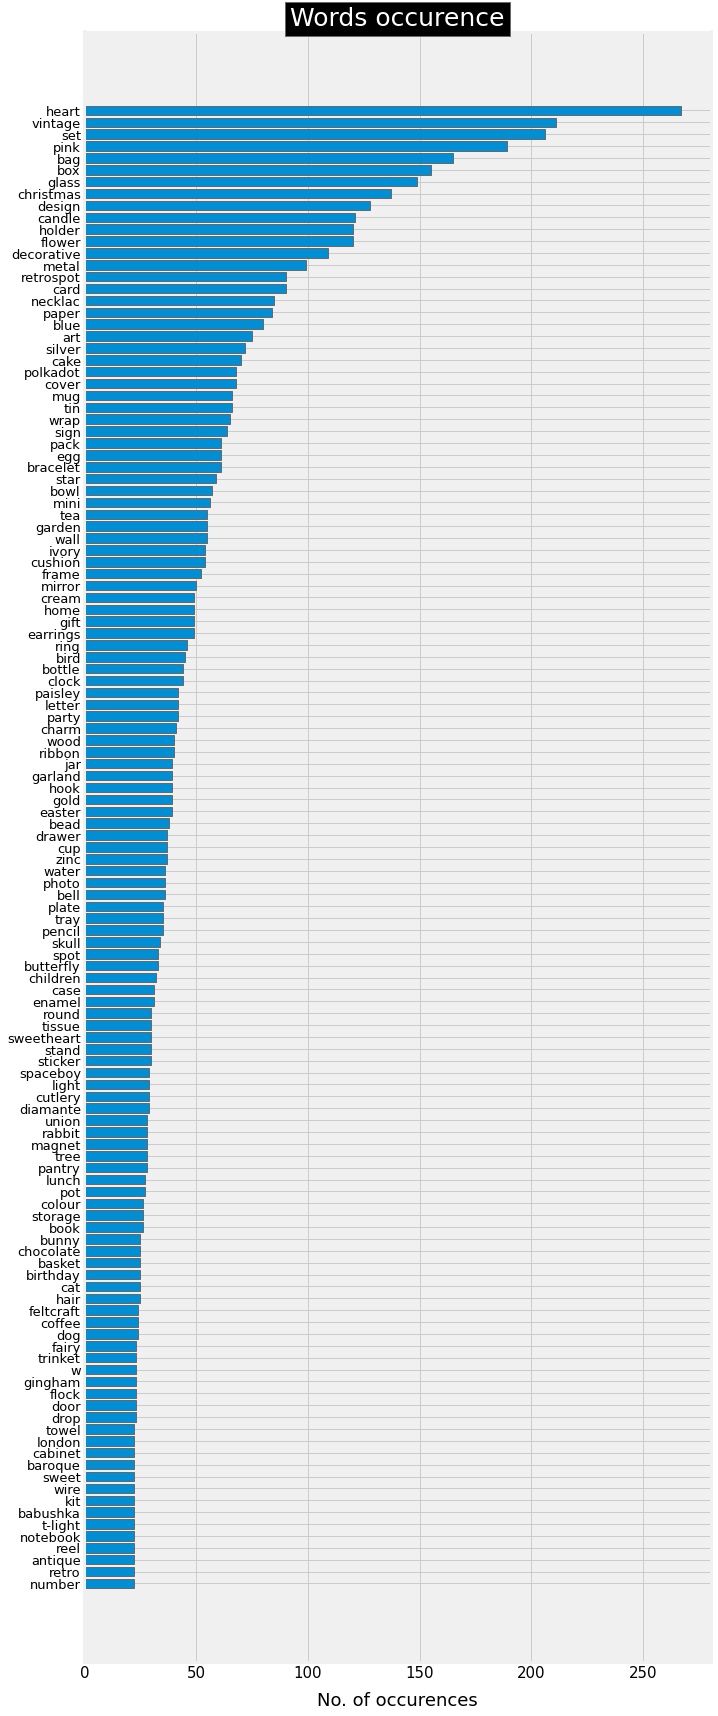

In [60]:
liste = sorted(list_products, key = lambda x:x[1], reverse = True)


plt.rc('font', weight='normal')
fig, ax = plt.subplots(figsize=(10, 30))
y_axis = [i[1] for i in liste[:125]]
x_axis = [k for k,i in enumerate(liste[:125])]
x_label = [i[0] for i in liste[:125]]
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 13)
plt.yticks(x_axis, x_label)
plt.xlabel("No. of occurences", fontsize = 18, labelpad = 10)
ax.barh(x_axis, y_axis, align = 'center')
ax = plt.gca()
ax.invert_yaxis()


plt.title("Words occurence",bbox={'facecolor':'k', 'pad':5}, color='w',fontsize = 25)
plt.show()

### Defining product categories

The list that was obtained contains more than `1400 keywords` and the `most frequent` ones appear in more than `200 products`. However, while examinating the content of the list, I noticed that some names doesn't `depict any information`. Others do not carry enough information, like `colors`. Therefore, I'll discard these words from the analysis that follows and also, I'll decide to consider only the words that appear more than `13 times`.

In [61]:
list_products = []


# Loop through the count_keywords and check the different conditions
for k,v in count_keywords.items():
    word = keywords_select[k]
    if word in ['pink', 'blue', 'tag', 'green', 'orange']: continue
    if len(word) < 3 or v < 13: continue
    if ('+' in word) or ('/' in word): continue
    list_products.append([word, v])
    

# list most kept words
list_products.sort(key = lambda x:x[1], reverse = True)
print('words kept:', len(list_products))

words kept: 193


In [62]:
liste_produits = df_cleaned['Description'].unique()
X = pd.DataFrame()
for key, occurence in list_products:
    X.loc[:, key] = list(map(lambda x:int(key.upper() in x), liste_produits))

In [63]:
threshold = [0, 1, 2, 3, 5, 10]
label_col = []

for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])
    label_col.append(col)
    X.loc[:, col] = 0

for i, prod in enumerate(liste_produits):
    prix = df_cleaned[df_cleaned['Description'] == prod]['UnitPrice'].mean()
    j = 0
    while prix > threshold[j]:
        j+=1
        if j == len(threshold): break
    X.loc[i, label_col[j-1]] = 1

and to choose the appropriate ranges, I check the number of products in the different groups:

In [64]:
print("{:<8} {:<20} \n".format('range', 'no. products') + 20*'-')

for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])    
    print("{:<10}  {:<20}".format(col, X.loc[:, col].sum()))

range    no. products         
--------------------
0<.<1       964                 
1<.<2       1009                
2<.<3       673                 
3<.<5       606                 
5<.<10      470                 
.>10        156                 


### Creating clusters of products

In this section, I will group the products into different classes. In the case of matrices with binary encoding, the most suitable metric for the calculation of distances is the `Hamming's metric`. Note that the `kmeans` method of sklearn uses an `Euclidean distance` that can be used, but it is not to the best choice in the case of `categorical variables`. However, in order to use the `Hamming's metric`, we need to use the `kmodes` package which is not available on the current platform. Hence, I use the kmeans method even if this is not the best choice.

In order to define (approximately) the number of clusters that best represents the data, I use the `silhouette score`:

In [65]:
matrix = X.to_numpy()
sil_score=[]
for n_clusters in range(3,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    sil_score.append(silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.09751688498995637
For n_clusters = 4 The average silhouette_score is : 0.12609893747265383
For n_clusters = 5 The average silhouette_score is : 0.12666226252150753
For n_clusters = 6 The average silhouette_score is : 0.14371323518203294
For n_clusters = 7 The average silhouette_score is : 0.14947593348699773
For n_clusters = 8 The average silhouette_score is : 0.14067876687480554
For n_clusters = 9 The average silhouette_score is : 0.14163826275419977


In practice, the scores obtained above can be considered equivalent since, depending on the run, scores of  `0.1±0.05`  will be obtained for all clusters with `n_clusters  >  3` (we obtain slightly lower scores for the first cluster). On the other hand, I found that beyond `5 clusters`, some clusters contained very few elements. I therefore choose to separate the dataset into `5 clusters`. In order to ensure a good classification at every run of the notebook, I iterate untill we obtain the best possible silhouette score, which is, in the present case, around `0.15`:

In [66]:
n_clusters = 5
silhouette_avg = -1
while silhouette_avg < 0.145:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.14548817363894032


### Characterizing the content of clusters

I check the number of `elements` in every `class`:

In [67]:
pd.Series(clusters).value_counts()

3    1118
1    1009
4     673
0     606
2     472
dtype: int64

#### b. Word Cloud

Now we can have a look at the type of objects that each `cluster` represents. In order to obtain a `global view` of their contents, I determine which keywords are the most frequent in each of them

In [68]:
liste = pd.DataFrame(liste_produits)
liste_words = [word for (word, occurence) in list_products]

occurence = [dict() for _ in range(n_clusters)]

for i in range(n_clusters):
    liste_cluster = liste.loc[clusters == i]
    for word in liste_words:
        if word in ['art', 'set', 'heart', 'pink', 'blue', 'tag']: continue
        occurence[i][word] = sum(liste_cluster.loc[:, 0].str.contains(word.upper()))

The result outputed as `wordclouds`:

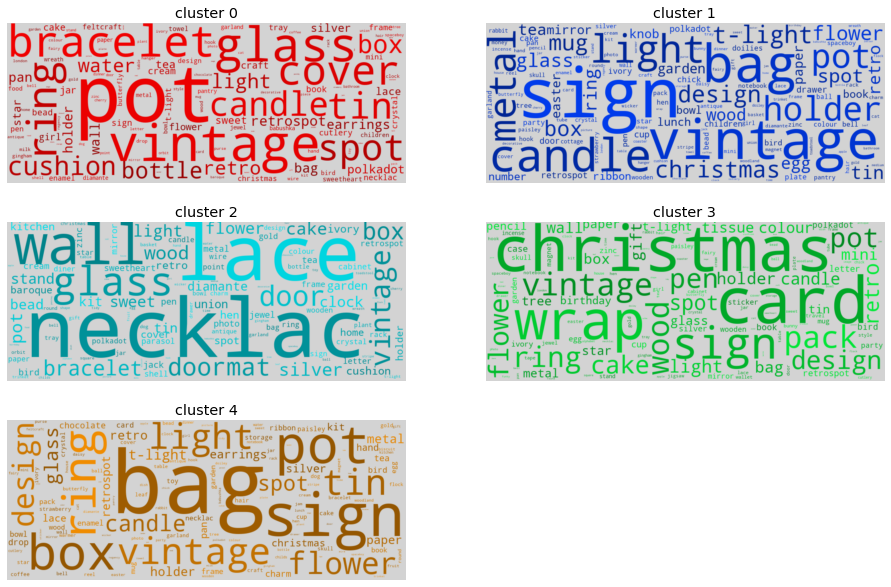

In [69]:
#
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

#
def make_wordcloud(liste, increment):
    ax1 = fig.add_subplot(4,2,increment)
    words = dict()
    trunc_occurences = liste[0:150]
    for s in trunc_occurences:
        words[s[0]] = s[1]
        
    #
    wordcloud = WordCloud(width=1000,height=400, background_color='lightgrey', 
                          max_words=1628,relative_scaling=1,
                          color_func = random_color_func,
                          normalize_plurals=False)
    wordcloud.generate_from_frequencies(words)
    ax1.imshow(wordcloud, interpolation="bilinear")
    ax1.axis('off')
    plt.title('cluster {}'.format(increment-1))
    
#
fig = plt.figure(1, figsize=(14,14))
color = [0, 160, 130, 95, 280, 40, 330, 110, 25]
for i in range(n_clusters):
    list_cluster_occurences = occurence[i]

    tone = color[i] # define the color of the words
    liste = []
    for key, value in list_cluster_occurences.items():
        liste.append([key, value])
    liste.sort(key = lambda x:x[1], reverse = True)
    make_wordcloud(liste, i+1) 

From the above representation, we can see that for example, one of the clusters contains objects that could be associated with `gifts` 
* (`keywords: Christmas, packaging, card, ...`). 

Another cluster would rather contain `luxury items` and `jewelry` 
* (`keywords: necklace, bracelet, lace, silver, ...`).  

Nevertheless, it can also be observed that many words appear in various clusters and it is therefore difficult to clearly distinguish them.

In [70]:
corresp = dict()
for key, val in zip (liste_produits, clusters):
    corresp[key] = val 

df_cleaned['categ_product'] = df_cleaned.loc[:, 'Description'].map(corresp)

In [74]:
for i in range(5):
    col = 'cluster_{}'.format(i)        
    df_temp = df_cleaned[df_cleaned['categ_product'] == i]
    price_temp = df_temp['UnitPrice'] * (df_temp['Quantity'] - df_temp['QuantityCanceled'])
    price_temp = price_temp.apply(lambda x:x if x > 0 else 0)
    df_cleaned.loc[:, col] = price_temp
    df_cleaned[col].fillna(0, inplace = True)
    

df_cleaned[['InvoiceNo', 'Description', 'categ_product', 'cluster_0', 'cluster_1', 'cluster_2', 'cluster_3','cluster_4']][:5]

,InvoiceNo,Description,categ_product,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,4,0.00,0.0,0.0,0.0,15.3
1,536365,WHITE METAL LANTERN,0,20.34,0.0,0.0,0.0,0.0
2,536365,CREAM CUPID HEARTS COAT HANGER,0,22.00,0.0,0.0,0.0,0.0
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,0,20.34,0.0,0.0,0.0,0.0
4,536365,RED WOOLLY HOTTIE WHITE HEART.,0,20.34,0.0,0.0,0.0,0.0
